In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

In [2]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/prithwirajmitra/covid-face-mask-detection-dataset
License(s): copyright-authors
 95% 196M/207M [00:01<00:00, 147MB/s]
100% 207M/207M [00:01<00:00, 132MB/s]


In [3]:

! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [5]:

import os
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')

train_nomask_dir = os.path.join(train_dir,'Non Mask')

In [6]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])


['0205.jpg', '0719.jpg', '0029.jpg', '1523.jpg', '0171.jpg', '1243.jpg', '0247.jpg', '1608.jpeg', '0161.jpg', '1106.jpg']


In [7]:
train_nomask_names = os.listdir(train_nomask_dir)
train_mask_names[:10]

['0205.jpg',
 '0719.jpg',
 '0029.jpg',
 '1523.jpg',
 '0171.jpg',
 '1243.jpg',
 '0247.jpg',
 '1608.jpeg',
 '0161.jpg',
 '1106.jpg']

['/content/New Masks Dataset/Train/Mask/0205.jpg', '/content/New Masks Dataset/Train/Mask/0719.jpg', '/content/New Masks Dataset/Train/Mask/0029.jpg', '/content/New Masks Dataset/Train/Mask/1523.jpg', '/content/New Masks Dataset/Train/Mask/0171.jpg', '/content/New Masks Dataset/Train/Mask/1243.jpg', '/content/New Masks Dataset/Train/Mask/0247.jpg', '/content/New Masks Dataset/Train/Mask/1608.jpeg', '/content/New Masks Dataset/Train/Mask/0161.jpg', '/content/New Masks Dataset/Train/Mask/1106.jpg']
['/content/New Masks Dataset/Train/Non Mask/145.jpg', '/content/New Masks Dataset/Train/Non Mask/163.jpg', '/content/New Masks Dataset/Train/Non Mask/50.jpg', '/content/New Masks Dataset/Train/Non Mask/46.jpg', '/content/New Masks Dataset/Train/Non Mask/251.jpg', '/content/New Masks Dataset/Train/Non Mask/269.jpg', '/content/New Masks Dataset/Train/Non Mask/193.jpg', '/content/New Masks Dataset/Train/Non Mask/114.jpg', '/content/New Masks Dataset/Train/Non Mask/259.jpg', '/content/New Masks Da

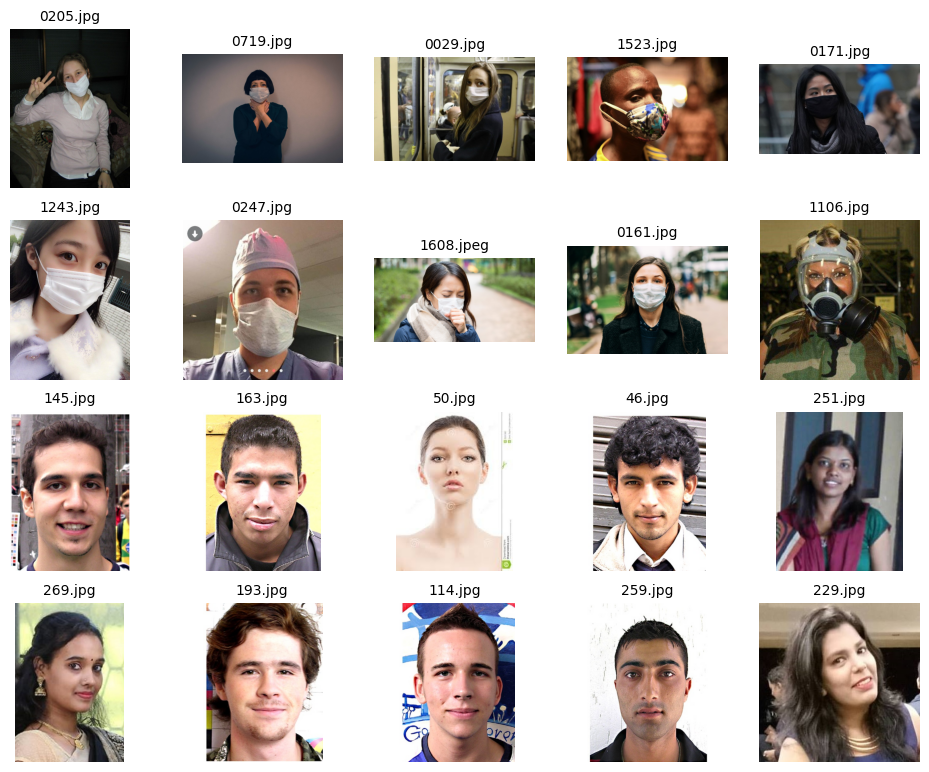

In [8]:
import matplotlib.image as mpimg
nrows = 5
ncols = 5
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:10]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:10]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_list = mask_pic+nomask_pic

for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',5)[5]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range=0.2,rotation_range=40,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=32,class_mode='binary')

valid_generator = validation_datagen.flow_from_directory(valid_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [17]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 75, 75, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 37, 37, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 37, 37, 64)       

In [19]:
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_generator,epochs=30,validation_data=valid_generator)

Epoch 1/30
19/19 [==============================] - 46s 2s/step - loss: 3.1820 - accuracy: 0.5400 - val_loss: 0.6931 - val_accuracy: 0.5163
Epoch 2/30
19/19 [==============================] - 44s 2s/step - loss: 0.6816 - accuracy: 0.5100 - val_loss: 0.6913 - val_accuracy: 0.6438
Epoch 3/30
19/19 [==============================] - 47s 2s/step - loss: 0.6292 - accuracy: 0.6533 - val_loss: 0.6446 - val_accuracy: 0.6961
Epoch 4/30
19/19 [==============================] - 45s 2s/step - loss: 0.4694 - accuracy: 0.7833 - val_loss: 0.5095 - val_accuracy: 0.8007
Epoch 5/30
19/19 [==============================] - 45s 2s/step - loss: 0.3790 - accuracy: 0.8383 - val_loss: 0.4157 - val_accuracy: 0.8399
Epoch 6/30
19/19 [==============================] - 47s 2s/step - loss: 0.2915 - accuracy: 0.8850 - val_loss: 0.4067 - val_accuracy: 0.8464
Epoch 7/30
19/19 [==============================] - 43s 2s/step - loss: 0.2828 - accuracy: 0.8900 - val_loss: 0.3340 - val_accuracy: 0.8725
Epoch 8/30
19/19 [==

Text(0.5, 0, 'epoch')

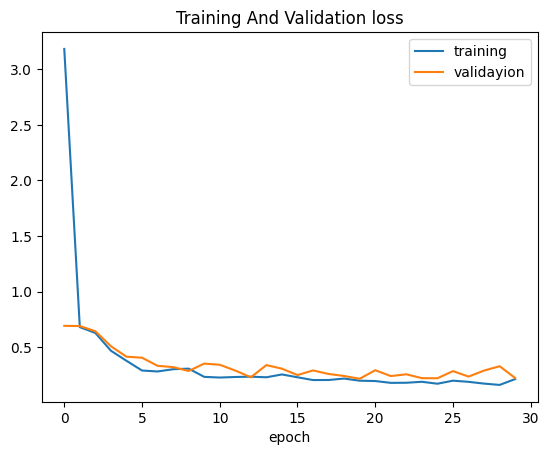

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validayion'])
plt.title('Training And Validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

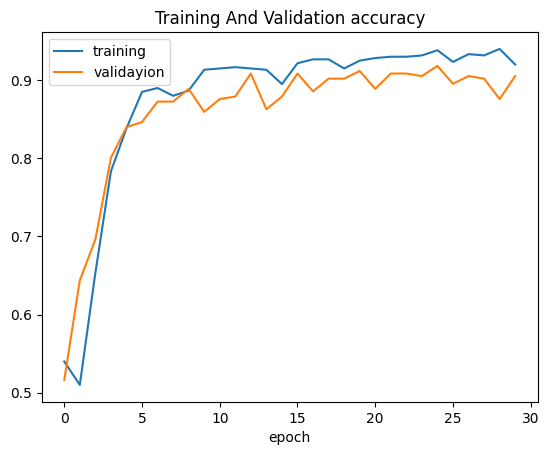

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validayion'])
plt.title('Training And Validation accuracy')
plt.xlabel('epoch')

In [23]:

test_loss , test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 3s 502ms/step - loss: 0.1734 - accuracy: 0.9400
test loss:0.1734294295310974 test acc:0.9399999976158142


In [29]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+ fname
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction == 0:
    print('masked')
  else:
    print('no mask')


Saving real_01062.jpg to real_01062.jpg
1/1 [==============================] - 0s 45ms/step
real_01062.jpg
no mask


In [42]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
